BERTRAND Evan, BOUZIANE Abderrahmane, MOSCA Mathias, TARIK Yasmine

<center><h1>P2I 7 - Comment la Terre tremble : déclenchement et cycle sismique.</h1></center>

https://developer.mozilla.org/fr/docs/Web/CSS/text-align

## Sommaire <a id='Sommaire'></a>
[Introduction](#introduction)
1. [Démarche scientifique](#1)
2. [1 bloc](#2)
    1. [Equations](#2.1)
    2. [Loi de frottement](#2.2)
    3. [Implementation numérique](#2.3)
    4. [Etude parametrique](#2.4)
3. [N blocs](#3)
    1. [Equations](#3.1)
    2. [Implementation numérique](#3.2)
    3. [Interpretation](#3.3)
    4. [Analyse](#3.4)
4. [Verification de la loi de Gutenberg-Richter](#4)
5. [Critique/ccl](#5)

## Introduction <a name="introduction"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

Intro


La lithosphère, la couche externe de la Terre, est constituée d’une dizaine de plaques de tailles différentes. Les plaques tectoniques sont en mouvement, elles se déplacent de quelques millimètres à plusieurs centimètres par an
. Ces déplacements provoquent des contraintes à leurs frontières entraînant une accumulation d’énergie gigantesque. Lorsque cette énergie dépasse le seuil de rupture de roches présentes dans les plaques, une secousse se produit : c'est le tremblement de terre ou séisme. L’énergie est brutalement libérée et les roches glissent le long de la faille. <br>
En d'autres termes, il s'agit d'un problème d'instabilité de contact entre deux solides, impliquant des interactions entre un réservoir d'énergie potentielle (la déformation accumulée dans les plaques) et une interface rugueuse et hétérogène avec une loi de comportement a priori inconnue.<br>
Un modèle simple pour représenter un tel système est un bloc muni d'un ressort et d'un patin, accompagné d'une loi de frottement "radoucissante". Ce type de modèle est appelé modèle de "Burridge-Knopoff".

Démarche scientifique je pense

Notre objectif est de modéliser une faille sismique afin de reproduire plusieurs cycles sismiques pour retrouver des lois que l’on observe empiriquement : lois de distribution magnitude-fréquence, dans notre cas la loi  de Gutenberg-Richter.
<br>Nous utilisons pour cela le modèle de Burridge-Knopoff, constitué de masses reliées en chaîne par des ressorts, tirées par une vitesse de chargement constante. Cette vitesse
représente le déplacement des plaques tectoniques ou autres à une distance lointaine de la faille. L’autre faille est représentée par une plaque fixe sur laquelle les blocs se déplacent, avec une loi de frottement particulière dite “radoucissante”.
<br>Ce modèle représente assez bien la réalité, avec l’accumulation de déformation à l’interface des 2 failles, et ce jusqu’à la rupture quand les frottements ne sont plus suffisants.

## Demarche scientifique <a name="1"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

Afin de retrouver la loi de Gutenberg-Richter, nous avons besoin d'obtenir une simulation d'un très grand nombre d'évènements sismiques pour pouvoir analyser statistiquement les résultats. Grâce à nos recherches préliminaires sur le modèle de Burridge-Knopoff, nous avons une idée du comportement global de notre simulation.
<br>
Première étape
<br>
Pour commencer, nous avons chercher à comprendre un modèle simplifié du système de Burridge-Knopoff ne comportant qu'un seul bloc. Notre but est de nous assurer que le schéma numérique appliqué est correct, et surtout de trouver des paramètres (raideurs des ressorts, loi de frottement ...) qui nous rapprochent des résultats attendus.
<br>
Seconde étape
<br>
Simu à Nbloc
complexifier cellle de 1 bloc


unités arbitraire/adimensionnel

## 1 bloc <a name="2"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

<div style="text-align: center;">
	<img src="schema 1 bloc.png" width="170">
</div>
<br>
<center><i>Fig. 1 - Schéma du modèle de Burridge-Knopoff simplifié à 1 bloc</i></center>

####  Équations <a name="2.1"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

Soit $U(t)$ la position du bloc au temps $t$.
</br>En dynamique, le bilan des forces sur le bloc est :
- Frottements : $\vec F_{frott}$ selon $-\vec u_x$
- Force de rappel du ressort de chargement : $\vec F_c = k_c (V_c\times t-U(t))\cdot \vec u_x$


</br>Enfin, le PFD appliqué sur le bloc nous donne :
$$
m\ddot U(t) = k_c (V_c\times t-U(t)) - F_{frott}
$$

#### Loi de frottement <a name="2.2"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

<div style="text-align: center;">
	<img src="Graph frottement.png" width="300">
</div>
<br>
<center><i>Fig. 2 - Graphique de la loi de frottement utilisée</i></center>

La loi de frottement que l'on considère est dite "radoucissante" : les frottements diminuent avec la distance glissée, jusqu'à atteindre un seuil constant. C'est cette loi de frottement qui fait toute la particularité de notre modèle. Les différents paramètres sur lesquels on peut jouer sont :
- $d_c$ : la distance de glissement avant d'atteindre le comportement linéaire
- $\mu_s$ : le coefficient de frottement statique a dépassé pour rentrer en glissement
- $\mu_s$ : le coefficient de frottement dynamique en régime linéaire

#### Implementation numérique <a name="2.3"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

<div class="alert alert-success">

Le code contenu dans cette partie est à executer pour obtenir un graphique
</div>

Initialisation des paramètres :

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Niter = int(1e5)
dt = 1e-1

k = 1
vc = 0.0001
m = 1

mu_s = 0.25
mu_d = 0.2
dc = 1e-6

T = np.arange(0, (Niter+1)*dt, dt)
U = np.array([0.0 for i in range(Niter+1)])
V = np.array([0.0 for i in range(Niter+1)])
A = np.array([0.0 for i in range(Niter+1)])

Formule explicite de la force de frottement et du ressort :

In [4]:
def frottement(u):
    global u0
    if u-u0 < dc:
        return (u-u0)*(mu_d-mu_s)/dc + mu_s
    else:
        return mu_d

def f_ressort(t,u):
    return k*(vc*t - u)

Pour déterminer si le solveur devra être dynamique ou statique à la prochaine itération, on test si toutes les forces autres que le frotteent additionnées sont supérieures à $\mu_s$. Si c'est le cas, on passe en dynamique (Glissement = True ).Sinon, U[i+1] = U[i].
<br>
Le glissement ne s'arrête ensuite que lorsque le bloc commence à revenir en arrière, ce que l'on considère comme impossible dans notre modèle. Ce non-retour arrière est caractérisé par le test V[i+1] < 0.
<br>
Enfin, dans le cas ou l'on est bien en dynamique, on utilise un schéma de Verlet à un pas pour trouver la position U et la vitesse V au temps suivant, en fonction des forces qui s'appliquent au bloc :
$$U_{i+1} = U_i + dt\times V_i + \frac{dt^2}{2}\times A_i$$
$$V_{i+1} = V_i + dt\times\frac{A_i + A_{i+1}}{2}$$

In [5]:
glissement = False
u0 = 0
for i in range(Niter):
    if glissement:
        U[i+1] = U[i] + dt*V[i] +dt**2*(f_ressort(T[i], U[i])  - frottement(U[i]))/(2*m)
        V[i+1] = V[i] + dt*(f_ressort(T[i], U[i])  - frottement(U[i]) + f_ressort(T[i+1], U[i+1])- frottement(U[i+1]))/(2*m)
    else:
        U[i+1] = U[i]

    if f_ressort(T[i+1], U[i+1]) >= mu_s:
        glissement = True
        u0 = U[i+1]       #position au début du glissement

    if V[i+1] < 0 :
        glissement = False

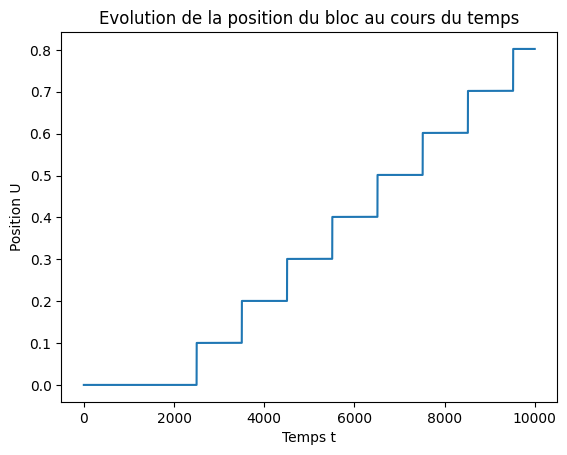

In [6]:
plt.plot(T,U)
plt.xlabel('Temps t')
plt.ylabel('Position U')
plt.title('Evolution de la position du bloc au cours du temps')
plt.show()

Maintenant que le code fonctionne, nous allons tester l'impact des différents paramètres sur l'allure de la courbe. Le but est d'avoir des phases de glissements très courtes par rapport à la durée des phases statiques (le graphique obtenu ci-dessus est déjà optimisé)

#### Etude paramétrique <a name="2.4"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

mettre une courbe illustrant ce que l'on a fait

## N blocs <a name="3"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

Maintenant que nous avons un modèle qui fonctionne, nous avons complexifié (voir p3/5 rapport mi parcours)

<div style="text-align: center;">
	<img src="schema N blocs.png">
</div>
</br>
<center><i>Fig. 3 - Schéma du modèle de Burridge-Knopoff</i></center>

#### Équations <a name="3.1"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

Blocs numérotés par $i \in [1, N]$, avec $U_i(t)$ la position du bloc $i$ au temps $t$.
</br>En dynamique, le bilan des forces sur le bloc $i$ est :
- Frottements : $\vec F_{frott}$ selon $-\vec u_x$
- Force de rappel du ressort de chargement : $\vec F_c = k_c ((i-1)*a + V_c\times t-U_i(t))\cdot \vec u_x$
- Ressort de gauche : $\vec F_{gauche} = -k_p (U_i(t) - U_{i-1}(t) - a)\cdot \vec u_x$
- Ressort de droite : $\vec F_{droite} = k_p (U_{i+1}(t) - U_i(t) - a)\cdot \vec u_x$

</br>Enfin, le PFD sur le bloc $i$ nous donne :
$$
\begin{cases}
    \begin{align}
        m\ddot U_1(t) &= k_c (V_c\times t-U_1(t)) + k_p (U_2(t) - U_1(t) - a) - F_{frott}\\
        m\ddot U_i(t) &= k_c ((i-1)\times a + V_c\times t-U_i(t)) + k_p (U_{i+1}(t) - 2U_i(t) + U_{i-1}(t)) - F_{frott} & \forall i, 1<i<N\\
        m\ddot U_N(t) &= k_c ((N-1)\times a + V_c\times t-U_N(t)) - k_p (U_N(t) - U_{N-1}(t) - a) - F_{frott}
    \end{align}
\end{cases}
$$

#### Implementation numérique <a name="3.2"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

test glissement ou non (force dépass mu_s
expliquer arret glissement (pas de  retour arrière des blocs)
Verlet

In [7]:
#mettre code (preciser pas necessaire dexecuter)

inserer courbe directement + interpretation

animation

<div style="text-align: center;">
	<video width = "1000" alt="test" controls>
        <source src="Animation 50 blocs 1e6.mp4" type="video/mp4">
	</video>
</div>

#### Interprétation des évènements <a name="3.3"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

inserer courbe directement + interpretation

#### Analyse des données <a name="3.4"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

inserer courbe directement + interpretation

In [9]:
from IPython.display import HTML


HTML("""
    <video width = "1000" alt="test" controls>
        <source src="Animation 50 blocs 1e6.mp4" type="video/mp4">
    </video>
""")

## Verification de la loi de Gutenberg-Richter <a name="5"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

## Conclusion <a name="5"></a>
<div style="text-align: right"

[Retour au sommaire](#Sommaire)

Nos simulations nous ont permis d'obtenir une courbe fréquence-magnitude semblable à celle de la loi de distribution de Gutenberg-Richter. Sur cette corube, nous pouvons remarqué deux comportements différent : une partie linéaire et une partie courbe pour les fortes magnitudes.
<br><br>
- La zone globalement linéaire représente les nombreux glissements "internes" à la faille. C'est-a-dire des séismes de magnitudes faible à intermédiaires dûs à un déplacement de blocs inférieurs au nombre de bloc dans la faille. Ce résultat est physiquement représentatif de la relation fréquence-magnitude de type Gutemberg-Richter observable lors d'études statistiques d'un grand nombre de séismes.
<br><br>
- La partie courbes située vers les très fortes magnitudes est dûe aux conditions limite. En effet, la taille de la faille modéliser ne peut pas être infini. Ainsi, lors d'un glissement de l'ensemble des blocs, nous obtenons une magnitude élévée mais celle-ci n'est que très peu fréquente. Ceci provient de la taille caractéristique de la faille, qui dans notre simulation, correspond au nombre de blocs multiplié par la distance interblocs, ici 0.01. En théorie, avec une faille de longueur infinie, le comportement linéaire devrait être le seul présent dans ce graphique. De ce fait, nous ne tiendrons pas compte des quelques points au magnitudes importantes.
<br><br>
Finalement,

Finalement, nous avons modéliser un sytème de Burridge-Knopoff unidimensionel à N bloc dans le but de retrouver la loi de Gutenberg-Richter.
Notre implémentation algorithmique avec la mise en place d'un schéma de Verlet à un pas nous a permis d'obtenir ces résulats. Nous avons donc atteint les objectifs fixés au début du projet, c'est-a-dire aboutir à une loi de distribution fréquence-magnitude.